<a href="https://colab.research.google.com/github/Cabranet/cabranet-notebooks/blob/main/VO2maxSexDifferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# VO2max Differences between Male and Female Sports Science Students

The following description is taken from one of my daughter Amaya's lab reports from her course at Liverpool John Moores University (LJMU)

> **Study Design**
>
> The study used a cross sectional design and was a single visit, as the students were only required to attend the lab at Liverpool John Moores University on one occasion. They completed an incremental exercise test to exhaustion.

The aim of this notebook is to see if I can use Python to produce similar or better data visualisations to the ones that Amaya produced for her lab report.

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data from the CSV file
vo2max_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/VO2max Data.csv')
vo2max_df['VO2max'] = (vo2max_df['VO2lmin'] / vo2max_df['Weight'] * 1000).round(2)
# View the number of rows and columns
print(vo2max_df.shape)

vo2max_male = vo2max_df[vo2max_df['Sex'] == 'Male']
vo2max_female = vo2max_df[vo2max_df['Sex'] == 'Female']
print(vo2max_male.describe())
print(vo2max_female.describe())

(60, 6)
            Age      Height      Weight    VO2lmin     VO2max
count  30.000000   30.000000  30.000000  30.000000  30.000000
mean   19.200000  176.536667  78.013333   3.480000  44.659000
std     1.095445    7.611266   7.217447   0.298444   1.647509
min    18.000000  160.400000  65.000000   3.000000  41.120000
25%    18.250000  172.850000  74.250000   3.200000  43.555000
50%    19.000000  177.300000  77.500000   3.525000  44.720000
75%    20.000000  181.725000  81.000000   3.700000  45.665000
max    23.000000  188.000000  94.200000   4.100000  48.050000
            Age      Height      Weight    VO2lmin     VO2max
count  30.000000   30.000000  30.000000  30.000000  30.000000
mean   19.700000  163.236667  63.096667   2.428333  38.635000
std     1.784029    8.246064   5.195123   0.376390   6.304098
min    18.000000  151.600000  54.000000   2.000000  30.000000
25%    19.000000  156.250000  59.150000   2.200000  35.327500
50%    19.000000  162.500000  63.350000   2.325000  37.595000


# Using the Seaborn library to plot two sets of data on the same axes
I like the way you can customise the scatter points and the regression lines using...
```
scatter_kws={}
line_kws={}
```
I also found out that you can add a legend using..
```
plt.legend(labels=['Male','Female'], loc='upper left')
```


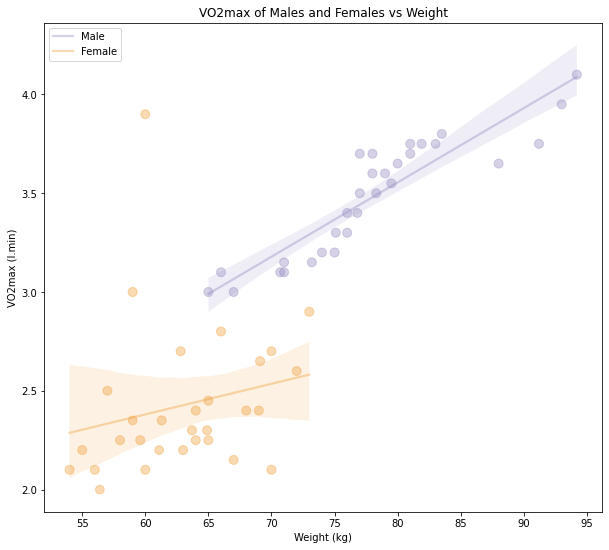

In [190]:
fig, ax = plt.subplots(figsize=(10,9))

sns.regplot(
    data=vo2max_male,
    x='Weight',
    y='VO2lmin',
    scatter_kws={'s': 100 - vo2max_male['Age '], 'color' : '#998ec3', 'alpha':0.4},
    line_kws={'color' : '#998ec3', 'alpha':0.4},
    label='Male'
    )

sns.regplot(
    data=vo2max_female,
    x='Weight',
    y='VO2lmin',
    scatter_kws={'s': 100 - vo2max_female['Age '], 'color' : '#f1a340', 'alpha':0.4},
    line_kws={'color' : '#f1a340', 'alpha':0.4}
    )

ax.set_title('VO2max of Males and Females vs Weight')
ax.set_ylabel('VO2max (l.min)')
ax.set_xlabel('Weight (kg)')
plt.legend(labels=['Male','Female'], loc='upper left')

plt.show()